## Data cleaning, feature engineering, and modeling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/voter-survey-december16.csv')

In [3]:
pattern = '(imiss_).{1}(_2016)'
def return_imiss_cols(df):
    imiss_cols = []
    for col in df.columns:
        if re.search(pattern, col):
            imiss_cols.append(col)
    return imiss_cols

# issue column list
imiss_col_list = return_imiss_cols(df)

In [4]:
# target column list  
target_col_list = ['presvote16post_2016']
df_target = df[target_col_list]

In [5]:
df_issue = df[imiss_col_list].fillna(0)
df_issue['imiss_j_2016'].value_counts()#.isna().sum()

1.0    5947
2.0    1688
3.0     181
0.0     127
4.0      57
Name: imiss_j_2016, dtype: int64

In [6]:
df_issue = df_issue.astype(str)
df_issue = df_issue.join(df_target)

In [7]:
df_dummies = pd.get_dummies(df_issue)

In [8]:
df_dummies.corr()['presvote16post_2016'].abs().sort_values(ascending=False)

presvote16post_2016    1.000000
imiss_l_2016_1.0       0.304989
imiss_d_2016_1.0       0.286253
imiss_y_2016_1.0       0.267083
imiss_u_2016_1.0       0.254038
imiss_x_2016_1.0       0.240264
imiss_g_2016_1.0       0.230016
imiss_p_2016_1.0       0.226241
imiss_l_2016_4.0       0.212959
imiss_u_2016_3.0       0.192896
imiss_q_2016_1.0       0.185467
imiss_g_2016_4.0       0.182592
imiss_d_2016_3.0       0.179266
imiss_l_2016_3.0       0.178131
imiss_y_2016_4.0       0.176428
imiss_p_2016_3.0       0.155080
imiss_y_2016_3.0       0.153542
imiss_j_2016_1.0       0.147418
imiss_x_2016_3.0       0.144682
imiss_i_2016_1.0       0.140380
imiss_f_2016_1.0       0.137812
imiss_s_2016_1.0       0.135825
imiss_i_2016_3.0       0.135604
imiss_k_2016_1.0       0.133861
imiss_r_2016_1.0       0.132862
imiss_h_2016_1.0       0.129626
imiss_x_2016_4.0       0.123174
imiss_q_2016_3.0       0.120913
imiss_i_2016_4.0       0.120097
imiss_e_2016_1.0       0.119690
                         ...   
imiss_r_

In [9]:
df_dummies.shape

(8000, 116)

In [10]:
df_predictors = df_dummies.drop('presvote16post_2016', axis=1)

In [11]:
df_predictors.head()

,imiss_a_2016_0.0,imiss_a_2016_1.0,imiss_a_2016_2.0,imiss_a_2016_3.0,imiss_a_2016_4.0,imiss_b_2016_0.0,imiss_b_2016_1.0,imiss_b_2016_2.0,imiss_b_2016_3.0,imiss_b_2016_4.0,...,imiss_x_2016_0.0,imiss_x_2016_1.0,imiss_x_2016_2.0,imiss_x_2016_3.0,imiss_x_2016_4.0,imiss_y_2016_0.0,imiss_y_2016_1.0,imiss_y_2016_2.0,imiss_y_2016_3.0,imiss_y_2016_4.0
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


## Create clustering model

In [103]:
X = df_predictors

In [104]:
from sklearn.cluster import KMeans
from sklearn import metrics 

In [105]:
k_means = KMeans(n_clusters=2)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [106]:
labels = k_means.labels_

In [107]:
y_pred = k_means.predict(X)

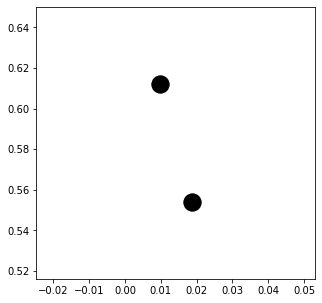

In [108]:
plt.figure(figsize=(5,5))
cl_centers = k_means.cluster_centers_
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=300)

In [109]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.09122755047749001

In [110]:
metrics.calinski_harabasz_score(X, labels)

836.4878129298589

In [111]:
df_target = df[target_col_list]
print(df_target.shape)
df_target_arr = np.ravel(df_target)

(8000, 1)


In [138]:
df_target_arr
y_pred.shape

(8000,)

In [159]:
dataset = pd.DataFrame({ 'y_pred': y_pred}, 
                        columns=[ 'y_pred']
                        )

In [160]:
dataset.head()

,y_pred
0,1
1,0
2,1
3,0
4,1


In [161]:
dataset.target.value_counts()

AttributeError: 'DataFrame' object has no attribute 'target'

In [162]:
dataset.y_pred.value_counts()

0    4358
1    3642
Name: y_pred, dtype: int64

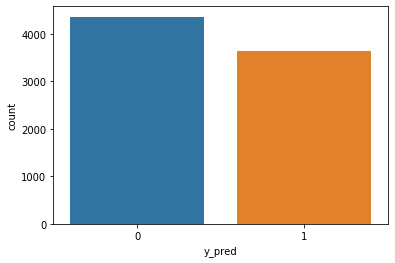

In [164]:
sns.countplot(test.y_pred)

In [177]:
target_pred_df = df_predictors.join(df_target).join(dataset)
target_pred_df.head(10)

,imiss_a_2016_0.0,imiss_a_2016_1.0,imiss_a_2016_2.0,imiss_a_2016_3.0,imiss_a_2016_4.0,imiss_b_2016_0.0,imiss_b_2016_1.0,imiss_b_2016_2.0,imiss_b_2016_3.0,imiss_b_2016_4.0,...,imiss_x_2016_2.0,imiss_x_2016_3.0,imiss_x_2016_4.0,imiss_y_2016_0.0,imiss_y_2016_1.0,imiss_y_2016_2.0,imiss_y_2016_3.0,imiss_y_2016_4.0,presvote16post_2016,y_pred
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1.0,1
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,2.0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1.0,1
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,3.0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,2.0,1
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1.0,1
6,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1.0,1
7,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,2.0,0
8,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1.0,1
9,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1.0,1


In [195]:
# def count_correct():
#     for row in target_pred_df:
#         if (df.presvote16post_2016 == 1.0) and (df.y_pred ==1):
#             count += 1
#     print(count)

count = 0
for row in target_pred_df.itertuples():
    if (row.presvote16post_2016 == 2): #and (row.y_pred == 0):
        count +=1
print(count)


3479


In [193]:
2578/3545

0.7272214386459802

In [196]:
2795/3479

0.8033917792469101